<a href="https://colab.research.google.com/github/ssfatemi/DL-ML-Tutorial/blob/main/ML-python/7-LogisitReg_Datasplit/logisitcregression_datasplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


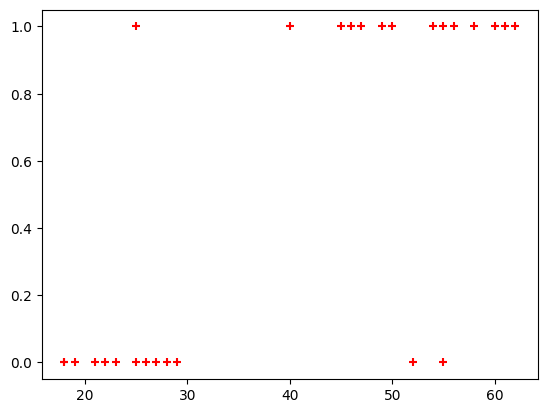

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

### Data Splitting
Training and Test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

X_test

,age
11,28
6,55
14,49
23,45
5,56
0,22


### Regression

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_predicted = model.predict(X_test)
print(X_test)
print(y_predicted )
print(model.score(X_test,y_test))
model.predict_proba(X_test)
3

    age
11   28
6    55
14   49
23   45
5    56
0    22
[0 1 1 1 1 0]
0.8333333333333334


array([[0.79492993, 0.20507007],
       [0.05935767, 0.94064233],
       [0.13612008, 0.86387992],
       [0.22481229, 0.77518771],
       [0.05139284, 0.94860716],
       [0.90636073, 0.09363927]])

### Maual Sigmoid fitting

In [10]:
print(['coef',model.coef_,'-inter:',model.intercept_])

['coef', array([[0.15251422]]), '-inter:', array([-5.62530034])]


In [15]:

import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y
age = 35
print(prediction_function(age))
print(model.predict_proba([[35]]))


0.4850044983805899
[[0.57133567 0.42866433]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Exercise

In [16]:
# Loading directly from kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("giripujar/hr-analytics")

print("Path to dataset files:", path)

100%|██████████| 111k/111k [00:00<00:00, 53.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/giripujar/hr-analytics/versions/1


In [19]:
# Uploading Manually

df = pd.read_csv("HR_comma_sep.csv")
df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


from matplotlib import pyplot as plt
_df_0['satisfaction_level'].plot(kind='hist', bins=20, title='satisfaction_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['last_evaluation'].plot(kind='hist', bins=20, title='last_evaluation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['number_project'].plot(kind='hist', bins=20, title='number_project')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['average_montly_hours'].plot(kind='hist', bins=20, title='average_montly_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='last_evaluation', y='number_project', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='number_project', y='average_montly_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='average_montly_hours', y='time_spend_company', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spend_company']
  ys = series['satisfaction_level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('time_spend_company', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
  _plot_series(series, series_name, i)
  fig.legend(title='salary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spend_company')
_ = plt.ylabel('satisfaction_level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spend_company']
  ys = series['last_evaluation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('time_spend_company', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
  _plot_series(series, series_name, i)
  fig.legend(title='salary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spend_company')
_ = plt.ylabel('last_evaluation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spend_company']
  ys = series['number_project']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('time_spend_company', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
  _plot_series(series, series_name, i)
  fig.legend(title='salary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spend_company')
_ = plt.ylabel('number_project')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spend_company']
  ys = series['average_montly_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('time_spend_company', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
  _plot_series(series, series_name, i)
  fig.legend(title='salary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spend_company')
_ = plt.ylabel('average_montly_hours')

from matplotlib import pyplot as plt
_df_13['satisfaction_level'].plot(kind='line', figsize=(8, 4), title='satisfaction_level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['last_evaluation'].plot(kind='line', figsize=(8, 4), title='last_evaluation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['number_project'].plot(kind='line', figsize=(8, 4), title='number_project')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['average_montly_hours'].plot(kind='line', figsize=(8, 4), title='average_montly_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='satisfaction_level', y='salary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='last_evaluation', y='salary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='number_project', y='salary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='average_montly_hours', y='salary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
dummies1 = pd.get_dummies(df.salary)
dummies1
#plt.scatter(df.salary,df.bought_insurance,marker='+',color='red')

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False
